In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

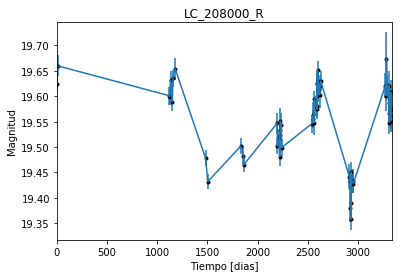

In [2]:
data = np.genfromtxt('LC_208000_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_208000_R')
plt.savefig("LC_208000_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

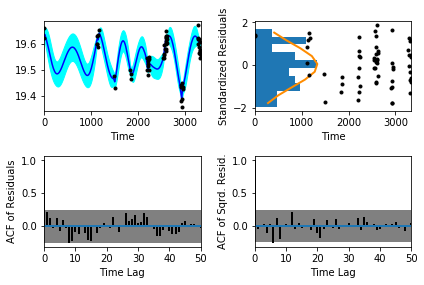

In [5]:
sample.assess_fit()

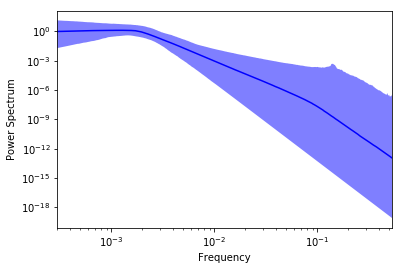

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

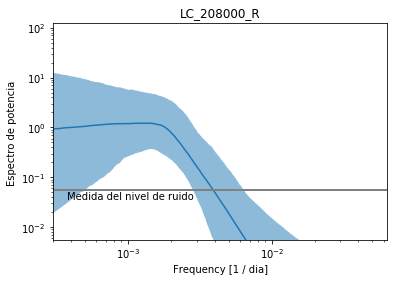

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_208000_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_208000_R')

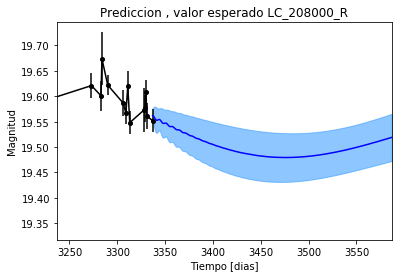

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_208000_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_208000_R')

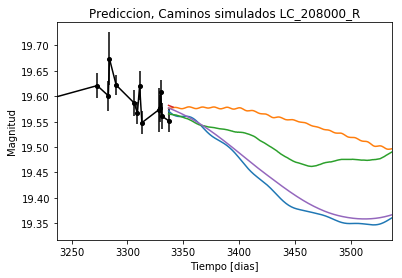

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_208000_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


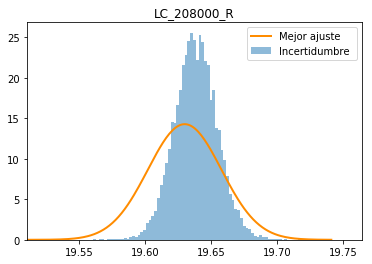

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_208000_R')
plt.savefig("Mejor_ajuste_LC_208000_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_208000_R')

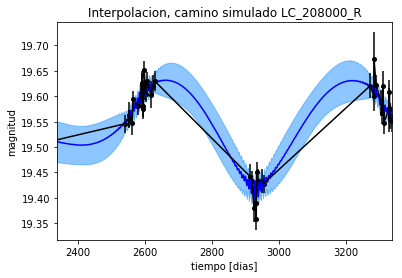

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_R')

Text(0.5,1,'Interpolacion, camino simulado LC_208000_R')

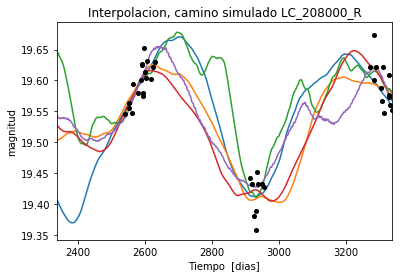

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 558.146755572
Median: 0.00220150378447
Standard deviation: 0.137086221555
68% credibility interval: [ 0.00049362  0.06430099]
95% credibility interval: [  3.22556574e-04   4.99864519e-01]
99% credibility interval: [  3.04775504e-04   9.11926917e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 566.615082298
Median: 0.00137274042153
Standard deviation: 0.0962907591404
68% credibility interval: [ 0.0004514  0.0203043]
95% credibility interval: [ 0.00032023  0.30099762]
99% credibility interval: [  3.04772893e-04   7.42955963e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 422.408715724
Median: 0.00219224232402
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 750.233942042
Median: 149.95463012
Standard deviation: 2.07063516013
68% credibility interval: [ 147.62291417  151.67513114]
95% credibility interval: [ 144.878987    152.72798203]
99% credibility interval: [ 142.79254897  153.3853504 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 342.674587781
Median: 0.295500686889
Standard deviation: 1.86610951026
68% credibility interval: [ 0.02760319  2.75633239]
95% credibility interval: [ 0.01145574  6.26616788]
99% credibility interval: [  9.37430376e-03   9.90855955e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 278.351558188
Median: 0.129243756101
Standard deviation: 9.06756541321
68% credibility interval: [  2.72979781e-03   4.67752190e+00]
95% credibility interv

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3177.4750501
Median: 8.00315201143e-33
Standard deviation: 4.79448473641e+96
68% credibility interval: [  1.15155462e-71   3.37109691e+29]
95% credibility interval: [  3.07631673e-97   5.75661439e+85]
99% credibility interval: [  1.02239480e-101   2.56822623e+094]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2493.5764372
Median: 19.5357024097
Standard deviation: 0.0334725182932
68% credibility interval: [ 19.51192351  19.56429495]
95% credibility interval: [ 19.47922039  19.6104006 ]
99% credibility interval: [ 19.43646851  19.66674743]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 230.509673665
Median: 0.00405920437833
Standard deviation: 0.242344956381
68% credibility interval: [ 0.00067535  0.29220763]
95% credibility interval: [ 0.          0.90399786]
99% credibility interval: [ 0.          1.02378679]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 230.509673665
Median: 0.00405920437833
Standard deviation: 0.242344956381
68% credibility interval: [ 0.00067535  0.29220763]
95% credibility interval: [ 0.          0.90399786]
99% credibility interval: [ 0.          1.02378679]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 236.265463523
Median: 0.0
Standard deviation: 0.000896619508154
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 750.233942042
Median: 149.95463012
Standard deviation: 2.07063516013
68% credibility interval: [ 147.62291417  151.67513114]
95% credibility interval: [ 144.878987    152.72798203]
99% credibility interval: [ 142.79254897  153.3853504 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3680.87664939
Median: 0.00677284668435
Standard deviation: 0.00871571312166
68% credibility interval: [ 0.00414359  0.01239307]
95% credibility interval: [ 0.00275325  0.02800045]
99% credibility interval: [ 0.0021943   0.05070601]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 428.324793412
Median: 1.19640263272
Standard deviation: 0.185600021058
68% credibility interval: [ 1.02777309  1.38560669]
95% credibility interval: [ 0.86569331  1.5894618 ]
99% credibility interval: [ 0.71280985  1.74927044]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 3288.3786866
Median: 1.03586422791e-05
Standard deviation: 0.0267795039952
68% credibility interval: [  1.08170445e-34   7.81074827e-04]
95% credibility interval: [  1.45452707e-90   6.69421227e-03]
99% credibility interval: [  2.41731056e-97   2.07799317e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 558.146755572
Median: (-0.0138324562323-0.176756894134j)
Standard deviation: 1.74943230751
68% credibility interval: [-0.40401502-0.12438081j -0.00310149-2.51801459j]
95% credibility interval: [ -3.14074140e+00-4.72232161j  -2.02668272e-03-0.0124761j ]
99% credibility interval: [ -5.72980581e+00-6.02599503j  -1.91496097e-03-0.01052767j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 566.615082298
Median: (-0.00862518244714+0j)
Standard deviation: 1.63849027024
68% credibility interval: [-0.12757569+1.63226155j -0.00283624+0.00850014j]
95% credibility interval: [-1.89122384+0.10640955j -0.00201204+0.01074751j]
99% credibility interval: [ -4.66812999e+00+1.95687286j  -1.91494456e-03+0.00786057j]
Posterior summary for pa